In [1]:
## Importing Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import torch
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers, losses, optimizers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers import GaussianNoise
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

In [2]:
## Loading data
df = pd.read_csv("all_group_train_normalized.csv")

In [3]:
## Loading Benign Data
df1 = pd.read_csv("Benign Data.csv")

In [6]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [7]:
benign_data = df1.iloc[:,0:200]

In [8]:
benign_data

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
0,0.0,0.266667,0.098039,0.756863,0.25098,0.0,0.501961,0.015686,0.627451,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.203922,0.400000,0.462745,0.25098,0.0,0.501961,0.690196,0.741176,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.156863,0.294118,0.517647,0.25098,0.0,0.501961,0.823529,0.972549,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.156863,0.321569,0.254902,0.25098,0.0,0.501961,0.800000,0.231373,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.156863,0.035294,0.580392,0.25098,0.0,0.501961,0.078431,0.913725,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142056,0.0,0.156863,0.074510,0.070588,0.25098,0.0,0.501961,0.043137,0.419608,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142057,0.0,0.156863,0.200000,0.533333,0.25098,0.0,0.501961,0.917647,0.956863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142058,0.0,0.156863,0.450980,0.733333,0.25098,0.0,0.501961,0.666667,0.756863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142059,0.0,0.156863,0.117647,0.439216,0.25098,0.0,0.501961,0.000000,0.050980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_train = benign_data

In [44]:
## The Sprase autoencoer architecture
tf.random.set_seed(2)
# Denoising AE
input_dims = 200
model_DAE_SAE = Sequential()

model_DAE_SAE.add(Dense(input_dims, input_shape=(input_dims,)))
model_DAE_SAE.add(Dense(150, activation='relu'))
model_DAE_SAE.add(Dense(input_dims // 2, activation='relu'))
model_DAE_SAE.add(Dense(input_dims // 4, activation='relu'))

# Add sparsity constraint to the hidden layer
model_DAE_SAE.add(Dense(input_dims // 8, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-4)))

model_DAE_SAE.add(Dense(input_dims // 4, activation='relu'))
model_DAE_SAE.add(Dense(input_dims // 2, activation='relu'))
model_DAE_SAE.add(Dense(150, activation='relu'))
model_DAE_SAE.add(Dense(input_dims, activation='relu'))
model_DAE_SAE.compile(optimizer='adam', loss='mae')
model_DAE_SAE.fit(X_train, X_train, batch_size=256, epochs=500, shuffle=True)

Epoch 1/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0232
Epoch 2/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0182
Epoch 3/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0178
Epoch 4/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0171
Epoch 5/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0166
Epoch 6/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0153
Epoch 7/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0146
Epoch 8/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0140
Epoch 9/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0137
Epoch 10/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0135
Epoch 11/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0134
Epoch 12/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0133
Epoch 13/500


555/555 [==============================] - 4s 6ms/step - loss: 0.0077
Epoch 196/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 197/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0076
Epoch 198/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0076
Epoch 199/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0076
Epoch 200/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 201/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 202/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0076
Epoch 203/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0076
Epoch 204/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0076
Epoch 205/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 206/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 

555/555 [==============================] - 2s 4ms/step - loss: 0.0069
Epoch 388/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0069
Epoch 389/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0069
Epoch 390/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0068
Epoch 391/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0068
Epoch 392/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0068
Epoch 393/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0068
Epoch 394/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0068A: 0s - loss: 
Epoch 395/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0068
Epoch 396/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0068
Epoch 397/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0068
Epoch 398/500
555/555 [==============================] - 2s 4ms/step - loss:

In [12]:
## Experiment 1

In [ ]:
## Reconstructing different attack types and aversarial examples and Classifying them based on the thresholds

In [45]:
infiltration_attack = df[df['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
portscan_attack = df[df['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(portscan_attack.shape)
ddos_attack = df[df['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df[df['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df[df['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df[df['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

(8905, 200)
(8905, 200)
(8905, 200)
(8905, 200)
(8906, 200)
(8906, 200)


In [46]:
# infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(infiltration_attack.shape)
# # portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# # print(portscan_attack.shape)
# ddos_attack = df_2018[df_2018['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(ddos_attack.shape)
# bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(bruteforce_attack.shape)
# dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(dos_attack.shape)
# web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(web_attack.shape)

In [47]:
def recon_metrices(data, reconstructed_data):

    maes = np.absolute(data.values - reconstructed_data)
    
    for j in range(len(maes)):
        m = maes[j]
        r = reconstructed_data[j]
        for el in range(len(m)):
            if r[el] == 0:
                m[el] = 0
 
            
    mae_byte_list = []
    ip_mae_list = []
    tcp_header_mae_list = []
    tcp_options_mae_list = []
    tcp_segment_mae_list = []
    i=0
    for mae in maes:
        mae_byte = sum(mae) / np.count_nonzero(reconstructed_data[i])
        mae_byte_list.append(mae_byte)
        
        if np.count_nonzero(reconstructed_data[i][0:9]) != 0:
            ip_mae = sum(mae[0:9])/np.count_nonzero(reconstructed_data[i][0:9])
        else:
            ip_mae = 0
        ip_mae_list.append(ip_mae)

        if np.count_nonzero(reconstructed_data[i][9:25]) != 0:
            tcp_header_mae = sum(mae[9:25])/np.count_nonzero(reconstructed_data[i][9:25])
        else:
            tcp_header_mae = 0
        tcp_header_mae_list.append(tcp_header_mae)

        if np.count_nonzero(reconstructed_data[i][25:65]) != 0:
            tcp_options_mae = sum(mae[25:65])/np.count_nonzero(reconstructed_data[i][25:65])
        else:
            tcp_options_mae = 0
        tcp_options_mae_list.append(tcp_options_mae)

        if np.count_nonzero(reconstructed_data[i][65:200]) != 0:
            tcp_segment_mae = sum(mae[65:200])/np.count_nonzero(reconstructed_data[i][65:200])
        else:
            tcp_segment_mae = 0
        tcp_segment_mae_list.append(tcp_segment_mae)
        i += 1
    return mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list

In [48]:
recon_x_test_normal = model_DAE_SAE.predict(benign_data)

In [49]:
mae_byte_list_normal, ip_mae_list_normal, tcp_header_mae_list_normal, tcp_options_mae_list_normal, tcp_segment_mae_list_normal = recon_metrices(benign_data, recon_x_test_normal)

In [115]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('SAE_benign_MAE.csv', mae_byte_list_normal, delimiter=',')

In [50]:
mae_byte_avg = sum(mae_byte_list_normal) / np.count_nonzero(mae_byte_list_normal)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list_normal) / np.count_nonzero(ip_mae_list_normal)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list_normal) / np.count_nonzero(tcp_header_mae_list_normal)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list_normal) / np.count_nonzero(tcp_options_mae_list_normal)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list_normal) / np.count_nonzero(tcp_segment_mae_list_normal)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.03275706918802775
mae_byte_99_percentile 0.12508308403621438
mae_byte_95_percentile 0.059971142325804236
mae_byte_90_percentile 0.05286435707047038
ip_mae_avg 0.008504136958092639
tcp_header_mae_avg 0.04526458676403102
tcp_header_mae_avg 0.03799320467294582
tcp_segment_mae_avg 0.16895744866771634


In [51]:
recon_portscan = model_DAE_SAE.predict(portscan_attack)

In [52]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(portscan_attack, recon_portscan)

In [53]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.9724873666479505
1.0
1.0


In [54]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('SAE_portscan_MAE.csv', mae_byte_list, delimiter=',')

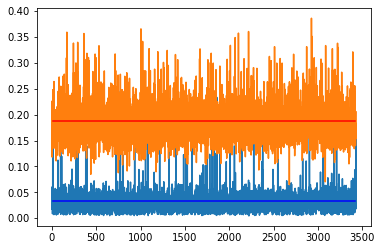

In [55]:
## Portscan mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [56]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1867633031217859
mae_byte_99_percentile 0.30841661360778033
mae_byte_95_percentile 0.25686141393235395
mae_byte_90_percentile 0.23582116873222034
ip_mae_avg 0.20390492828669143
tcp_header_mae_avg 0.19628228545494053
tcp_header_mae_avg 0.0881169070776795
tcp_segment_mae_avg 0.1665399761648351


In [57]:
recon_dos = model_DAE_SAE.predict(dos_attack)

In [58]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_attack, recon_dos)

In [59]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.8797439928138334
1.0
1.0


In [60]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('SAE_dos_MAE.csv', mae_byte_list, delimiter=',')

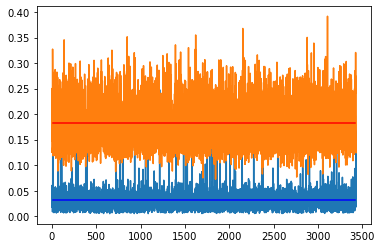

In [61]:
## DoS mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [62]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1818312920734579
mae_byte_99_percentile 0.3044897479608533
mae_byte_95_percentile 0.2714443215528267
mae_byte_90_percentile 0.2530819598162228
ip_mae_avg 0.18680876923759848
tcp_header_mae_avg 0.21503869509609108
tcp_header_mae_avg 0.15682973464174557
tcp_segment_mae_avg 0.1162565097397654


In [63]:
recon_ddos = model_DAE_SAE.predict(ddos_attack)

In [64]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_attack, recon_ddos)

In [65]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.6490735541830432
0.9778775968556991
0.9889949466591802


In [66]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('SAE_ddos_MAE.csv', mae_byte_list, delimiter=',')

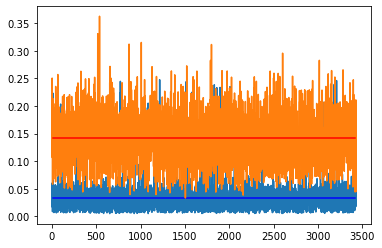

In [67]:
## DDoS
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [68]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1421446868215287
mae_byte_99_percentile 0.24940337965988524
mae_byte_95_percentile 0.21476215250410283
mae_byte_90_percentile 0.19793975224382795
ip_mae_avg 0.10371697243635063
tcp_header_mae_avg 0.16484226137324637
tcp_header_mae_avg 0.04353120341580548
tcp_segment_mae_avg 0.09994402638934434


In [69]:
recon_infiltration = model_DAE_SAE.predict(infiltration_attack)

In [70]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(infiltration_attack, recon_infiltration)

In [71]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.6406513194834362
1.0
1.0


In [72]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('SAE_infiltration_MAE.csv', mae_byte_list, delimiter=',')

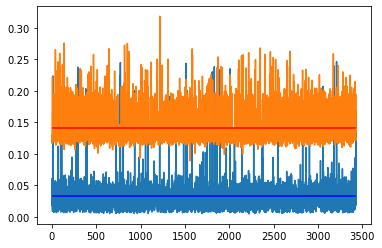

In [73]:
## Infiltration
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [74]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.14009302935706827
mae_byte_99_percentile 0.24201034646736147
mae_byte_95_percentile 0.2005901111290642
mae_byte_90_percentile 0.1888726025689299
ip_mae_avg 0.15473491498718756
tcp_header_mae_avg 0.2210920962514576
tcp_header_mae_avg 0.23396968050523595
tcp_segment_mae_avg 0.12244913409321823


In [75]:
recon_web = model_DAE_SAE.predict(web_attack)

In [76]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(web_attack, recon_web)

In [77]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.8995059510442398
1.0
1.0


In [78]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('SAE_web_MAE.csv', mae_byte_list, delimiter=',')

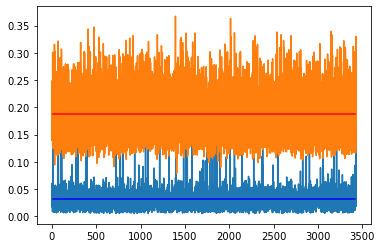

In [79]:
## Web attack
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [80]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.18810490557020443
mae_byte_99_percentile 0.3194411872621151
mae_byte_95_percentile 0.2833100275116728
mae_byte_90_percentile 0.2644312900550658
ip_mae_avg 0.20162735847470672
tcp_header_mae_avg 0.2224022746216487
tcp_header_mae_avg 0.23647368772940353
tcp_segment_mae_avg 0.11443285116020625


In [ ]:
## Brute Force

In [81]:
recon_brute = model_DAE_SAE.predict(bruteforce_attack)

In [82]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(bruteforce_attack, recon_brute)

In [83]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.958113419427288
1.0
1.0


In [84]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('SAE_brute_MAE.csv', mae_byte_list, delimiter=',')

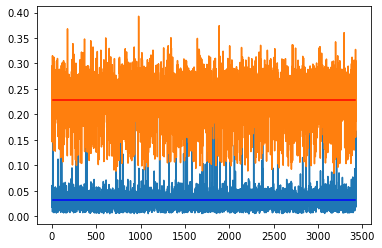

In [85]:
## Brute
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [86]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.22879471347426825
mae_byte_99_percentile 0.3216313943858709
mae_byte_95_percentile 0.29593211588025825
mae_byte_90_percentile 0.2845448642041209
ip_mae_avg 0.19722237559472408
tcp_header_mae_avg 0.23317877157624745
tcp_header_mae_avg 0.2142579333466516
tcp_segment_mae_avg 0.2517555643697056


In [ ]:
## CICIDS2018

In [ ]:
df_2018 = pd.read_csv("all_group_train_normalized_2018.csv")

In [ ]:
infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
# portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(portscan_attack.shape)
ddos_attack = df_2018[df_2018['Label'] == 'ddos'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

In [ ]:
recon_dos = model_DAE_SAE.predict(dos_attack)

In [ ]:
recon_ddos = model_DAE_SAE.predict(ddos_attack)

In [ ]:
recon_inf = model_DAE_SAE.predict(infiltration_attack)

In [ ]:
recon_web = model_DAE_SAE.predict(web_attack)

In [ ]:
recon_brute = model_DAE_SAE.predict(bruteforce_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(web_attack, recon_web)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.120])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.029])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.010])
print(count_90 / len(mae_byte_list))

In [ ]:
######
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
## Adv examples

In [87]:
p1 = pd.read_csv('adv_examples_portscan_DT.csv')
p2 = pd.read_csv('adv_examples_portscan_RF.csv')
p3 = pd.read_csv('adv_examples_portscan_SVC.csv')
p4 = pd.read_csv('adv_examples_portscan_MLP.csv')

In [88]:
port_adv = pd.concat([p1,p2,p3,p4]).sample(frac = 1).iloc[:,0:200]

In [89]:
recon_adv_port = model_DAE_SAE.predict(port_adv)

In [90]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(port_adv, recon_adv_port)

In [91]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.9913727480334941
1.0
1.0


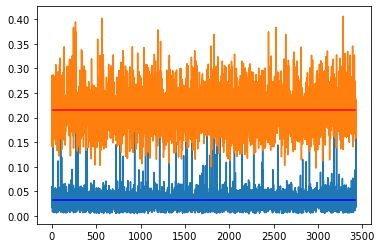

In [92]:
## Adv
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [93]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.21535527485221098
mae_byte_99_percentile 0.3234671384803781
mae_byte_95_percentile 0.28817078309525435
mae_byte_90_percentile 0.2640056096437211
ip_mae_avg 0.21244186737587584
tcp_header_mae_avg 0.28219006543413516
tcp_header_mae_avg 0.09279836827806746
tcp_segment_mae_avg 0.18051872225792254


In [94]:
d1 = pd.read_csv('adv_examples_dos_DT.csv')
d2 = pd.read_csv('adv_examples_dos_RF.csv')
d3 = pd.read_csv('adv_examples_dos_SVC.csv')
d4 = pd.read_csv('adv_examples_dos_MLP.csv')

In [95]:
dos_adv = pd.concat([d1,d2,d3,d4]).sample(frac = 1).iloc[:,0:200]

In [96]:
recon_adv_dos = model_DAE_SAE.predict(dos_adv)

In [97]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_adv, recon_adv_dos)

In [98]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.9517656429772546
0.9999114965926188
1.0


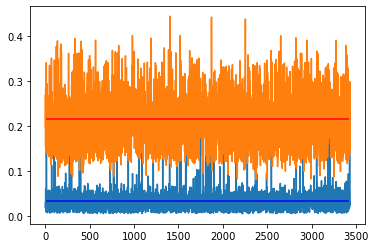

In [99]:
## Adv dos
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [100]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.21568217665163783
mae_byte_99_percentile 0.36720419210357325
mae_byte_95_percentile 0.3161000130635549
mae_byte_90_percentile 0.28624445447821023
ip_mae_avg 0.21065394978225083
tcp_header_mae_avg 0.266655435412305
tcp_header_mae_avg 0.20705502717647062
tcp_segment_mae_avg 0.14714142425734808


In [101]:
dd1 = pd.read_csv('adv_examples_ddos_DT.csv')
dd2 = pd.read_csv('adv_examples_ddos_RF.csv')
dd3 = pd.read_csv('adv_examples_ddos_SVC.csv')
dd4 = pd.read_csv('adv_examples_ddos_MLP.csv')

In [102]:
ddos_adv = pd.concat([dd1,dd2,dd3,dd4]).sample(frac = 1).iloc[:,0:200]

In [103]:
recon_adv_ddos = model_DAE_SAE.predict(ddos_adv)

In [104]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_adv, recon_adv_ddos)

In [105]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.9633422299689526
1.0
1.0


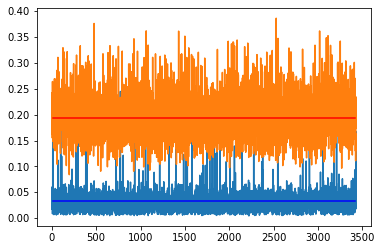

In [106]:
## Adv dos
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [107]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.19326380300524962
mae_byte_99_percentile 0.32279418210026234
mae_byte_95_percentile 0.2727701369929184
mae_byte_90_percentile 0.2498710285763807
ip_mae_avg 0.1403892935663384
tcp_header_mae_avg 0.22269703416987818
tcp_header_mae_avg 0.2837520568562374
tcp_segment_mae_avg 0.1987930091033518


In [108]:
inf1 = pd.read_csv('adv_examples_infiltration_DT.csv')
inf2 = pd.read_csv('adv_examples_infiltration_RF.csv')
inf3 = pd.read_csv('adv_examples_infiltration_SVC.csv')
inf4 = pd.read_csv('adv_examples_infiltration_MLP.csv')

In [109]:
inf_adv = pd.concat([inf1,inf2,inf3,inf4]).sample(frac = 1).iloc[:,0:200]

In [110]:
recon_adv_inf = model_DAE_SAE.predict(inf_adv)

In [111]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(inf_adv, recon_adv_inf)

In [112]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.125])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.059])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.052])
print(count_90 / len(mae_byte_list))

0.6420992256954402
1.0
1.0


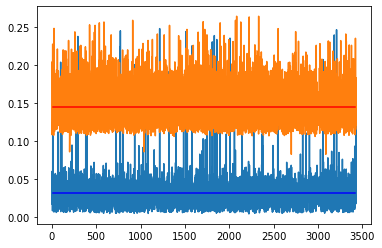

In [113]:
## Adv dos
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [114]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.14402399285798045
mae_byte_99_percentile 0.23153364217900502
mae_byte_95_percentile 0.20371740336960545
mae_byte_90_percentile 0.19141109052559424
ip_mae_avg 0.15337221047281127
tcp_header_mae_avg 0.21636978382743738
tcp_header_mae_avg 0.2592115789200992
tcp_segment_mae_avg 0.12972008108722707
